### Importación de Tensorflow

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importación de datos 

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("input/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting input/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting input/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### verificando los datos de prueba

In [4]:
mnist.train.images.shape

(55000, 784)

In [0]:
imagendemo=np.reshape(mnist.train.images[2,:],(28,28))

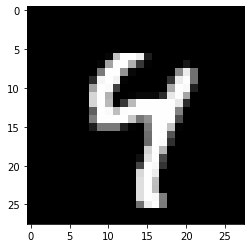

In [6]:
plt.imshow(imagendemo,cmap='gray')

### Declarando la arquitectura

Generando función 

In [0]:
def Neural_network_model(
    n_nodes_hl1=500,
    n_nodes_hl2=500,
    n_nodes_hl3=500,
    keep_rate = 0.8,
    n_classes=10
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784])
    y=tf.placeholder('float')
    
    #Imagenes 
    img = tf.reshape(x, shape=[-1, 28, 28, 1])
    # Declarando las variables 
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_fc':tf.Variable(tf.random_normal([7*7*64,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}
   
    
    
    # Declarando la arquitectura
    
    l1 = tf.nn.conv2d(img, weights['W_conv1'], strides=[1,1,1,1], padding='SAME')
    l1 = tf.add(l1, biases['b_conv1'])
    l1 = tf.nn.relu(l1)
    l1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #14*14*32
    
    l2 = tf.nn.conv2d(l1, weights['W_conv2'], strides=[1,1,1,1], padding='SAME')
    l2 = tf.add(l2, biases['b_conv2'])
    l2 = tf.nn.relu(l2)
    l2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    #7*7*64
    
    fc = tf.reshape(l2,[-1, 7*7*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']

    # Declarando la funcion de costo y entrenamiento
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    return dict(
              x=x,
              y=y,
              output=output,
              cost=cost,
              optimizer=optimizer
              )

In [8]:
Neural_network_model()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



{'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'output': <tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>,
 'x': <tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>}

In [0]:
def train_neural_network(DNN, hm_epochs=10,batch_size=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                feed_dict={DNN["x"]: epoch_x, 
                           DNN["y"]: epoch_y}
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"]], 
                                                feed_dict=feed_dict)
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels}))
        
        prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:mnist.test.images, DNN["y"]:mnist.test.labels})
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval())


In [10]:
DNN=Neural_network_model()
train_neural_network(DNN)

Epoch 0 completed out of 10 loss: 2999475.385498047
Epoch 1 completed out of 10 loss: 418432.1489086151
Epoch 2 completed out of 10 loss: 207100.53204512596
Epoch 3 completed out of 10 loss: 135372.61359715462
Epoch 4 completed out of 10 loss: 93691.33199596405
Epoch 5 completed out of 10 loss: 64766.525794386864
Epoch 6 completed out of 10 loss: 46286.413093179464
Epoch 7 completed out of 10 loss: 39252.28246451914
Epoch 8 completed out of 10 loss: 27779.706702560186
Epoch 9 completed out of 10 loss: 23392.162010685868
Accuracy: 1.0
Accuracy: 0.9751
